In [25]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rakibuleceruet/drowsiness-prediction-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/rakibuleceruet/drowsiness-prediction-dataset/versions/1


Found 7296 images belonging to 1 classes.
Found 1824 images belonging to 1 classes.
Epoch 1/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 163s 674ms/step - accuracy: 0.9951 - loss: 0.0232 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 2/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 201s 684ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 3/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 196s 654ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 4/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 151s 650ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 178s 764ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 6/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 177s 659ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 7/10
228/228 ━━━━━━━━━━━━━━━━━━━━ 199s 647ms/step - accuracy: 1.0000 - los

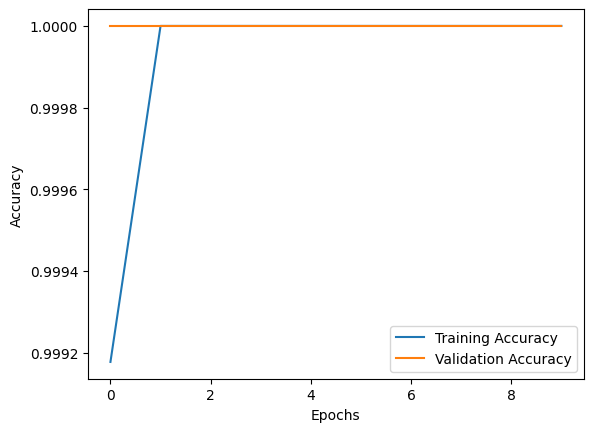

In [28]:

import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Dataset path from KaggleHub
dataset_path = "/root/.cache/kagglehub/datasets/rakibuleceruet/drowsiness-prediction-dataset/versions/1/"  # Replace this with the actual dataset path

# Ensure the dataset path exists
if not os.path.exists(dataset_path):
    raise ValueError("Dataset path not found. Please verify the path.")

# Data augmentation and preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,
    validation_split=0.2  # 80-20 train-validation split
)

# Load training and validation datasets
train_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_data = datagen.flow_from_directory(
    dataset_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Model architecture
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Binary classification
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(
    train_data,
    epochs=10,
    validation_data=val_data
)

# Evaluate the model
loss, accuracy = model.evaluate(val_data)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
